<a href="https://colab.research.google.com/github/artur01-code/mlbookcamp-code/blob/main/week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split as tts
%matplotlib inline

In [ ]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

--2022-09-24 08:28:07--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘housing.csv.7’

housing.csv.7       100%[===================>]   1.36M  --.-KB/s    in 0.04s   

2022-09-24 08:28:07 (33.9 MB/s) - ‘housing.csv.7’ saved [1423529/1423529]



In [ ]:
df = pd.read_csv('housing.csv')
df.columns = df.columns.str.lower().str.replace(' ', '_')
#df.dtypes
df.dtypes[df.dtypes == 'float64'].index

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

#Question 1
What is the most frequent observation (mode) for the column ocean_proximity?

Options:

* NEAR BAY
* <1H OCEAN
* INLAND
* NEAR OCEAN


In [ ]:
base = ['latitude', 'longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'ocean_proximity', 'median_house_value']

In [ ]:
df = df.fillna(0)
df['rooms_per_household'] = df['total_rooms'] / df['households']
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
df['population_per_household'] = df['population'] / df['households']


In [ ]:
df['ocean_proximity'].value_counts()


<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

#Question 2
* Create the correlation matrix for the numerical features of your train dataset.
* * In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.
* What are the two features that have the biggest correlation in this dataset?

Options:

* total_bedrooms and households
* total_bedrooms and total_rooms
* population and households
* population_per_household and total_rooms

In [ ]:
df_full_train, df_test = tts(df, test_size=0.2, random_state=42)

In [ ]:
df_train, df_val = tts(df_full_train, test_size=0.25, random_state=42)

In [ ]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.median_house_value.values
y_val = df_val.median_house_value.values
y_test = df_test.median_house_value.values

del df_train['median_house_value']
del df_val['median_house_value']
del df_full_train['median_house_value']

numerical = df_full_train.dtypes[df_full_train.dtypes == 'float64'].index

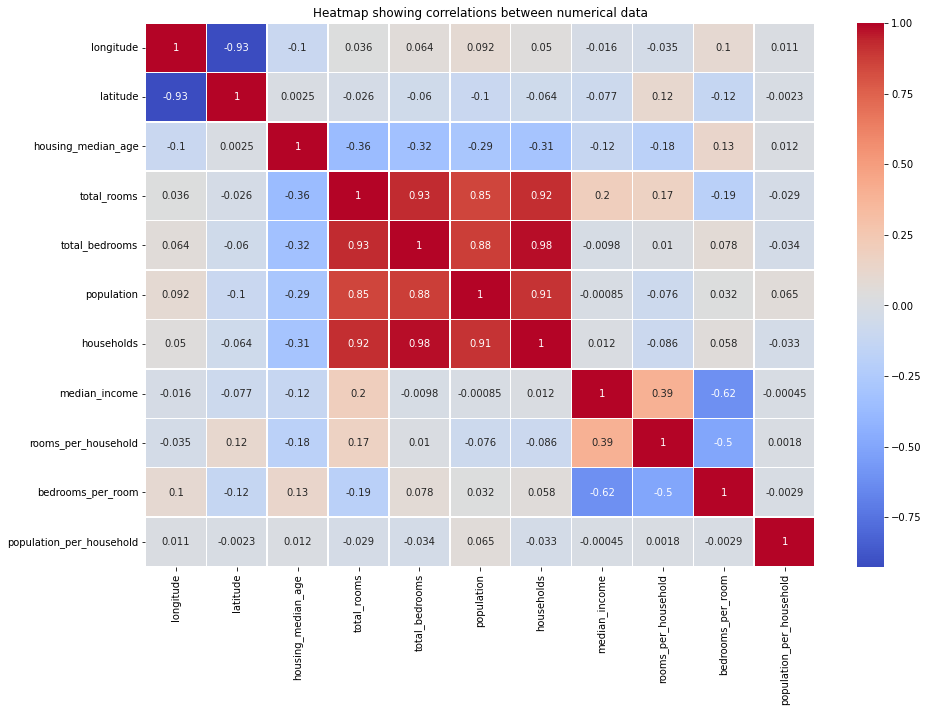

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df_train[numerical].corr(),annot=True,linewidths=.5, cmap="coolwarm")
plt.title('Heatmap showing correlations between numerical data')
plt.show()

#Make median_house_value binary
* We need to turn the median_house_value variable from numeric into binary.
* Let's create a variable above_average which is 1 if the median_house_value is above its mean value and 0 otherwise.
#Question 3
* Calculate the mutual information score with the (binarized) price for the categorical variable that we have. Use the training set only.
* What is the value of mutual information?
* Round it to 2 decimal digits using round(score, 2)

Options:

* 0.263
* 0.00001
* 0.101
* 0.15555


In [ ]:
df.loc[df['median_house_value'] > df['median_house_value'].mean(), 'above_average'] = 1
df.loc[df['median_house_value'] < df['median_house_value'].mean(), 'above_average'] = 0
df['above_average'] = df['above_average'].astype(int) 
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household,above_average
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556,1
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260,1
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945,1
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,5.045455,0.224625,2.560606,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,6.114035,0.215208,3.122807,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,5.205543,0.215173,2.325635,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,5.329513,0.219892,2.123209,0


In [ ]:
df_full_train, df_test = tts(df, test_size=0.2, random_state=42)
df_train, df_val = tts(df_full_train, test_size=0.25, random_state=42)

In [ ]:
categorical = df_full_train.dtypes[df_full_train.dtypes == 'object'].index

In [ ]:
from sklearn.metrics import mutual_info_score
def calculate_mi(series):
    return mutual_info_score(series, df_train.above_average)

df_mi = df_train[categorical].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')


round(df_mi, 2)


,MI
ocean_proximity,0.1


#Question 4
* Now let's train a logistic regression
* Remember that we have one categorical variable ocean_proximity in the data. Include it using one-hot encoding.
* Fit the model on the training dataset.
 * To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
 * model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
* Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

Options:

* 0.60
* 0.72
* 0.84
* 0.95

In [ ]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [ ]:
average = y_train.mean()
y_above_average_train = (y_train > average).astype(int)
y_above_average_val = (y_val > average).astype(int)
y_above_average_test = (y_test > average).astype(int)

In [ ]:
both = ['ocean_proximity', 'longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'rooms_per_household', 'bedrooms_per_room', 'population_per_household']

dv = DictVectorizer(sparse=False)

train_dict = df_train[both].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[both].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [ ]:
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_above_average_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [ ]:
y_pred = model.predict(X_val)
accuracy = (y_pred == y_above_average_val).mean()
round(accuracy, 2)

0.84

#Question 5

* Let's find the least useful feature using the feature elimination technique.
* Train a model with all these features (using the same parameters as in Q4).
* Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
* For each feature, calculate the difference between the original accuracy and the accuracy without the feature.
* Which of following feature has the smallest difference?
    * total_rooms
    * total_bedrooms
    * population
    * households

> note: the difference doesn't have to be positive




In [ ]:
accuracy_differences = []

model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)

for f in both:
    features = both.copy()
    features.remove(f)

    train_dict = df_train[features].to_dict(orient='records')
    X_train = dv.fit_transform(train_dict)

    val_dict = df_val[features].to_dict(orient='records')
    X_val = dv.transform(val_dict)

    model.fit(X_train, y_above_average_train)

    y_pred = model.predict(X_val)
    accuracy_differences.append(abs(accuracy - (y_pred == y_above_average_val).mean()))

print(sorted(list(zip(both, accuracy_differences)), key=lambda k: k[1]))

[('bedrooms_per_room', 0.0), ('population_per_household', 0.0), ('rooms_per_household', 0.001211240310077466), ('latitude', 0.0016957364341084746), ('households', 0.0021802325581394832), ('total_bedrooms', 0.0021802325581395943), ('total_rooms', 0.0029069767441860517), ('longitude', 0.004602713178294526), ('housing_median_age', 0.004602713178294526), ('population', 0.009205426356589164), ('ocean_proximity', 0.014534883720930258), ('median_income', 0.049903100775193776)]



#Question 6

*  For this question, we'll see how to use a linear regression model from Scikit-Learn
*  We'll need to use the original column median_house_value. Apply the logarithmic transformation to this column.
* Fit the Ridge regression model (model = Ridge(alpha=a, solver="sag", random_state=42)) on the training data.
* This model has a parameter alpha. Let's try the following values: [0, 0.01, 0.1, 1, 10]
* Which of these alphas leads to the best RMSE on the validation set? Round your RMSE scores to 3 decimal digits.

> If there are multiple options, select the smallest alpha.


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [ ]:
train_dict = df_train[both].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[both].to_dict(orient='records')
X_val = dv.transform(val_dict)

alpha = [0, 0.01, 0.1, 1, 10]
rmse = []

y_train_log = np.log1p(y_train)
y_val_log = np.log1p(y_val)

for a in alpha:
    model = Ridge(alpha=a, solver="sag", random_state=42)
    model.fit(X_train, y_train_log)
    
    y_pred = model.predict(X_val)
    rmse.append(round(mean_squared_error(y_val_log, y_pred, squared=False), 3))

print(sorted(list(zip(alpha, rmse)), key=lambda k: k[1], reverse=True))

[(0, 0.524), (0.01, 0.524), (0.1, 0.524), (1, 0.524), (10, 0.524)]
